In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

from moran import mixed_moran_fix_prob_sys

In [2]:
N = 7
df = pd.read_csv(f'./data/connected-n{N}-martin-results.csv', index_col=0)

In [3]:
weird_df = (
  df[df['p_Bd'].isin([0,.5,1])].drop(columns=['r','N', 'p_Bd', 'fix_time'])
    .groupby(['graph', 'initial_mutant_location'])
    # .agg(lambda x: np.isclose(x.iloc[1], x.iloc[2]) and x.iloc[0] < x.iloc[1])
    .agg(lambda x:
         (
          (
            (x.iloc[0] > x.iloc[1])
            and
            not np.isclose(x.iloc[0], x.iloc[1], atol=1e-12)
          )
          and
          (
           (x.iloc[2] < x.iloc[1])
           and
           not np.isclose(x.iloc[1], x.iloc[2], atol=1e-20)
          )
         )
    )
    .reset_index()
    .query('fix_prob == True')
    .drop(columns=['fix_prob'])
)
weird_df

,graph,initial_mutant_location
6,463f3f46770a,6
7,463f41466f0a,0
13,463f41466f0a,6
20,463f4146770a,6
26,463f4240770a,5
...,...,...
5959,465e7e7e770a,2
5960,465e7e7e770a,3
5961,465e7e7e770a,4
5962,465e7e7e770a,5


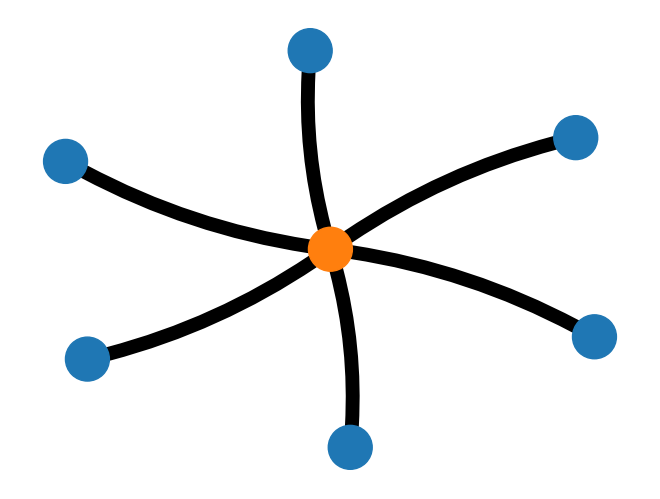

In [28]:
hex_str = weird_df.iloc[0].graph
initial_mutant_loc = weird_df.iloc[0].initial_mutant_location
G = nx.graph6.from_graph6_bytes(bytes.fromhex(hex_str).strip())
palette = sns.color_palette('tab10', n_colors=2)
colors = [palette[0] for i in range(N)]
colors[initial_mutant_loc] = palette[1]
nx.draw(
  G,
  pos=nx.spring_layout(G, seed=2025),
  node_color=colors,
  width=10,
  node_size=1000,
  connectionstyle='arc3,rad=.1',
  arrows=True,
)

In [ ]:
weird_examples_df.query(f"graph == '{hex_str}' and initial_mutant_location == {initial_mutant_loc}")

,N,graph,p_Bd,r,fix_prob,fix_time,initial_mutant_location


# Weird fixation time things (N=7)

We look at dB and Bd fixation times relative to the 1/2-mixed dB/Bd fixation time.
We want to see the relations.

| rel. dB | rel. Bd | graph        | initial mutant loc |
|---------|---------|--------------|--------------------|
| <       | <       | 464568655f0a | 4 |
| >       | >       | 464568754f0a | 2 |
| >       | <       | 46456e626f0a | 5 |
| <       | >       | 463f3f46770a | 0 |

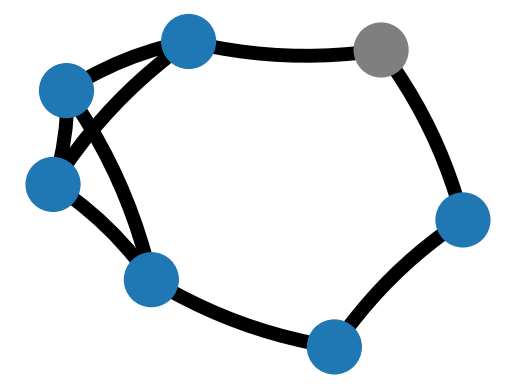

In [108]:
# hex_str = '' weird_df.iloc[0].graph
# initial_mutant_loc = weird_df.iloc[0].initial_mutant_location
hex_str = '464568655f0a'
initial_mutant_loc = 4
G = nx.graph6.from_graph6_bytes(bytes.fromhex(hex_str).strip())
palette = sns.color_palette('tab10', n_colors=10)
colors = [palette[0] for i in range(N)]
colors[initial_mutant_loc] = palette[7]
fig, ax = plt.subplots()
nx.draw(
  G,
  pos=(pos:=nx.spring_layout(G, seed=2025)),
  node_color=colors,
  width=10,
  node_size=1500,
  connectionstyle='arc3,rad=.1',
  arrows=True,
  # edgecolors='none',
  ax=ax,
)

# import math
# from matplotlib.patches import Ellipse
# node=initial_mutant_loc
# node_size=1500
# hatch=".."
# edgecolor="white"
# linewidth=5
# 
# r_points = math.sqrt(node_size / math.pi)
# 
# # convert points -> pixels
# ppd = ax.figure.dpi / 72.0
# r_px = r_points * ppd
# 
# # convert pixels -> data units separately in x and y
# inv = ax.transData.inverted()
# # delta for 1 pixel in display coords
# dx_data = inv.transform((1, 0)) - inv.transform((0, 0))
# dy_data = inv.transform((0, 1)) - inv.transform((0, 0))
# rx = r_px * dx_data[0]
# ry = r_px * dy_data[1]
# 
# x, y = pos[node]
# e = Ellipse((x, y), width=2*rx, height=2*ry,
#             facecolor='none', edgecolor=edgecolor,
#             linewidth=linewidth, hatch=hatch, zorder=10_000)
# ax.add_patch(e)

In [113]:
fig.savefig('./pics/ft-weird----graph.eps', transparent=True, bbox_inches='tight')

In [120]:
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

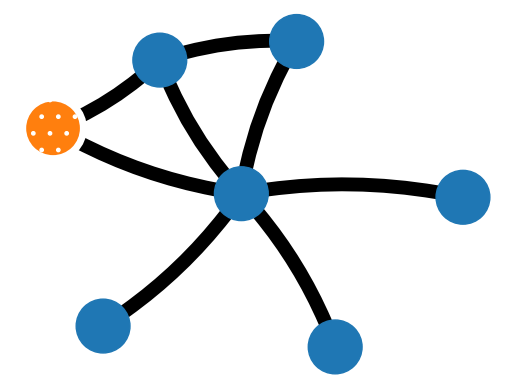

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# node_collection.remove()
# node_collection.set_figure(fig)
# fig.axes[0].add_collection(node_collection)
# print(node_collection.findobj()[0])




In [74]:
plt.show()

In [3]:
weird_examples_df = pd.read_csv('./data/weird-examples-7.csv')
weird_examples_df['p_dB'] = 1-weird_examples_df['p_Bd']
weird_examples_df['example'] = '(' + weird_examples_df['graph'].astype(str) + ', ' + weird_examples_df['initial_mutant_location'].astype(str) + ')'

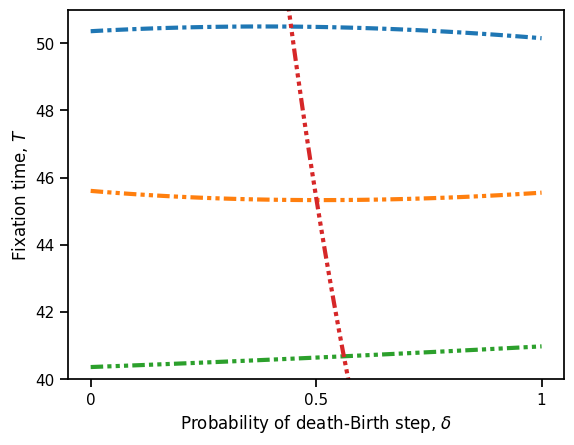

In [73]:

with (sns.plotting_context('notebook'),
    #  sns.axes_style("ticks", {"font.family": "sans-serif"}),
    #  plt.rc_context({
    #   "text.usetex": True,
    #   "text.latex.preamble": r"\usepackage{sfmath}",
    # })
):
  g = sns.lineplot(
    weird_examples_df,
    x='p_dB',
    y='fix_time',
    hue='example',
    legend=False,
    #c=palette[2],
    linewidth=3,
  )
  # for i in range(4):
  #   g.hlines(
  #     y=weird_examples_df[weird_examples_df['p_dB']==.5].iloc[i]['fix_time'],
  #                         xmin=0, xmax=1,
  #                         linestyles=(0, (3, 1) + (1, 1)*(i+1)),
  #                         colors='black',
  #                     )
  g.set(
    xlabel=r'Probability of death-Birth step, $\delta$',
    ylabel=r'Fixation time, $T$',
    # xlim=(1/2-.1, 1/2+.1),
    ylim=(40,51),
    xticks=[0.,.5,1],
    # yticks=[.1416, 1/7, .1434],
    xticklabels=['0', '0.5', '1'],
    # yticklabels=['0.1416', '$1/N$', '0.1434'],
  )

  linestyles=[
    (0, (3, 1) + (1, 1)*(0+1)),
    (0, (3, 1) + (1, 1)*(1+1)),
    (0, (3, 1) + (1, 1)*(2+1)),
    (0, (3, 1) + (1, 1)*(3+1)),
  ]
  for line, ls in zip(g.lines, linestyles):
    line.set_linestyle(ls)

In [74]:
g.figure.savefig('./pics/ft-weird-all-plot.eps', transparent=True, bbox_inches='tight')


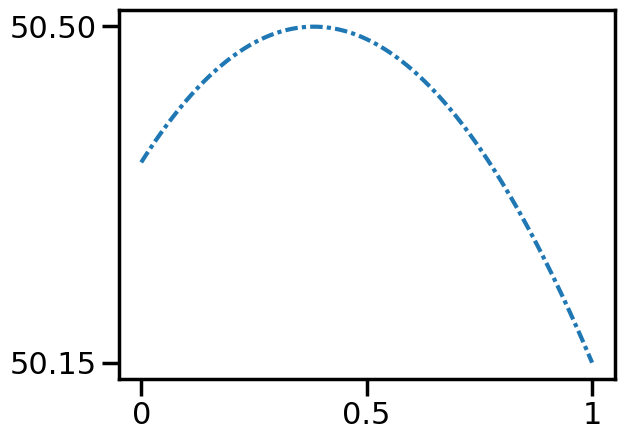

In [111]:
with sns.plotting_context('poster'):
  g = sns.lineplot(
    weird_examples_df[(weird_examples_df['graph']==hex_str) & (weird_examples_df['initial_mutant_location']==initial_mutant_loc)],
    # weird_examples_fp_df[(weird_examples_fp_df['graph'] == '463f3f46770a')&(weird_examples_fp_df['initial_mutant_location']==0)],
    # weird_examples_fp_df[(weird_examples_fp_df['graph'] == '463f4246770a')],
    x='p_dB',
    y='fix_time',
    # hue='example',
    legend=False,
    c=palette[0],
    linewidth=3,
    linestyle=(0, (3, 1) + (1, 1)*(1)),
  )

  g.set(
    xlabel='',#r'Probability of death-Birth step, $\delta$',
    ylabel='',#r'Fixation time, $T$',
    # xlim=(1/2-.1, 1/2+.1),
    # ylim=(1/7-.0013, 1/7+.0005),
    # xlim=(0, 1),
    # ylim=(.1, 1/7),
    xticks=[0,.5, 1],
    yticks=[50.15, 50.50],
    xticklabels=['0', '0.5', '1'],
    #yticklabels=['0', '$1/N$', '0.5'],
  )

In [112]:
g.figure.savefig('./pics/ft-weird----plot.eps', transparent=True, bbox_inches='tight')

<Axes: xlabel='p_Bd', ylabel='fix_time'>

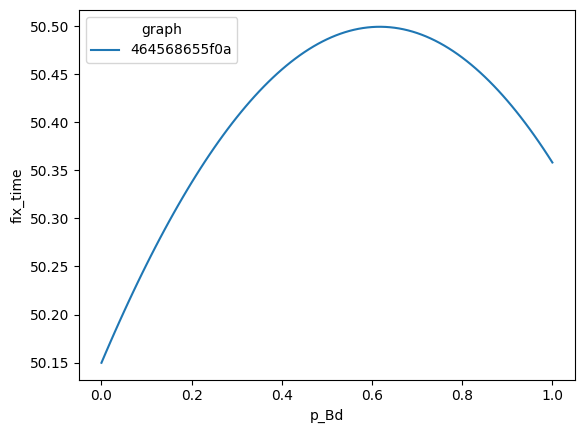

In [6]:
sns.lineplot(weird_examples_df[weird_examples_df['graph']=='464568655f0a'], x='p_Bd', y='fix_time', hue='graph')
# sns.lineplot(weird_examples_df, x='p_Bd', y='fix_time', hue='graph')

# Weird fixation probability things (N=7)

We look at dB and Bd fixation probabilities relative to the 1/2-mixed dB/Bd fixation probabilities.
We want to see the relations.

| rel. dB | rel. Bd | graph        | initial mutant loc |
|---------|---------|--------------|--------------------|
| <       | <       | 463f4246770a | 0 |
| >       | >       | N/A | N/A  |
| >       | <       | 463f3f46770a | 6 
| <       | >       | 463f3f46770a | 0 |

In [22]:
weird_examples_fp_df = pd.read_csv('./data/weird-examples-fp-7.csv')
weird_examples_fp_df['example'] = '(' + weird_examples_fp_df['graph'].astype(str) + ', ' + weird_examples_fp_df['initial_mutant_location'].astype(str) + ')'
weird_examples_fp_df['p_dB'] = 1-weird_examples_fp_df['p_Bd']

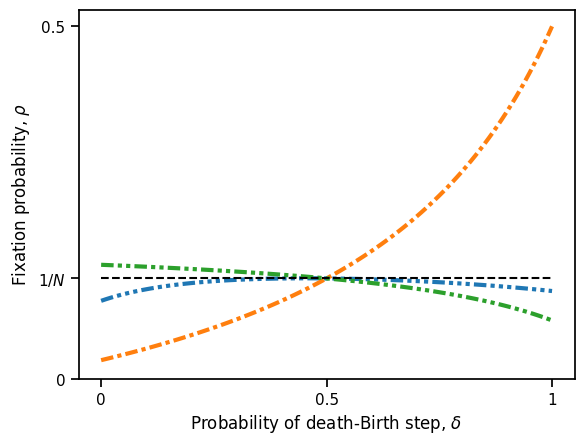

In [68]:
with (sns.plotting_context('notebook'),
# with (sns.plotting_context('poster'),
    #  sns.axes_style("ticks", {"font.family": "sans-serif"}),
    #  plt.rc_context({
    #   "text.usetex": True,
    #   "text.latex.preamble": r"\usepackage{sfmath}",
    # })
):
  g = sns.lineplot(
    weird_examples_fp_df,
    # weird_examples_fp_df[(weird_examples_fp_df['graph'] == '463f3f46770a')&(weird_examples_fp_df['initial_mutant_location']==0)],
    # weird_examples_fp_df[(weird_examples_fp_df['graph'] == '463f4246770a')],
    x='p_dB',
    y='fix_prob',
    hue='example',
    legend=False,
    # c=palette[2],
    linewidth=3,
  )
  linestyles=[
    (0, (3, 1) + (1, 1)*(2+1)),
    (0, (3, 1) + (1, 1)*(0+1)),
    (0, (3, 1) + (1, 1)*(1+1)),
  ]
  for line, ls in zip(g.lines, linestyles):
    line.set_linestyle(ls)

  g.hlines(y=1/N, xmin=0, xmax=1, linestyles='--', colors='black')
  g.set(
    xlabel=r'Probability of death-Birth step, $\delta$',
    ylabel=r'Fixation probability, $\rho$',
    # xlim=(1/2-.1, 1/2+.1),
    # ylim=(1/7-.0013, 1/7+.0005),
    # xlim=(0, 1),
    # ylim=(.1, 1/7),
    xticks=[0,.5, 1],
    yticks=[0, 1/7, .5],
    xticklabels=['0', '0.5', '1'],
    yticklabels=['0', '$1/N$', '0.5'],
  )

In [69]:
g.figure.savefig('./pics/fp-weird-all-plot.eps', transparent=True, bbox_inches='tight')
# g.figure.savefig('./pics/fp-weird-zoomed-plot.eps', transparent=True, bbox_inches='tight')
# g.figure.savefig('./pics/fp-weird--+-plot.eps', transparent=True, bbox_inches='tight')
# g.figure.savefig('./pics/fp-weird----plot.eps', transparent=True, bbox_inches='tight')
# g.figure.savefig('./pics/fp-weird-+--plot.eps', transparent=True, bbox_inches='tight')